# Aula 5 | Avaliando o melhor modelo de regressão

## Prevendo valores de imóveis

Na aula de hoje, vamos explorar um _dataset_ que contém algumas características sobre imóveis, tais como área, andar, suites, vista entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algoritmo preditivo que utilize essas características para predizer o valor do imóvel.

### Atributos

- Ordem: coluna ID
- Valor: valor do imóvel
- Area: tamanho da área do imóvel
- IA: idade do imóvel
- Andar: quantidade de andares
- Suites: quantidade de suítes
- Vista: se o imóvel possui uma boa vista ou não
- DistBM: distância do imóvel do mar
- SemRuido: se o imóvel é localizado em uma região calma ou não
- AV100m: distância próxima à área verde.

Vamos começar a trabalhar com os dados!

## Código

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# importa base de imóveis
imoveis = pd.read_csv('https://raw.githubusercontent.com/camimq/machine_learning_and_time_series/main/bases/Valorizacao_Ambiental.csv', sep = ';')
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [3]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [4]:
imoveis.shape

(172, 10)

In [5]:
# verifica se a base tem dados nulos
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [6]:
# estatística descritiva básica com arredondamento dos dados
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


### Identificando a variável _target_.

Text(0.5, 1.0, 'Histograma da variável valor')

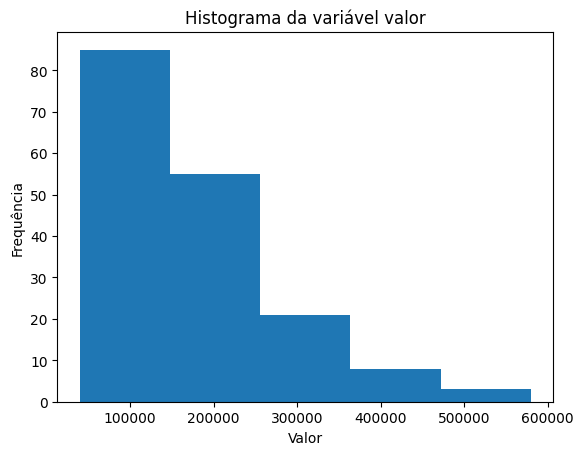

In [7]:
plt.hist(imoveis['Valor'], bins = 5)

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma da variável valor')

In [8]:
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])

In [9]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada aplicada')

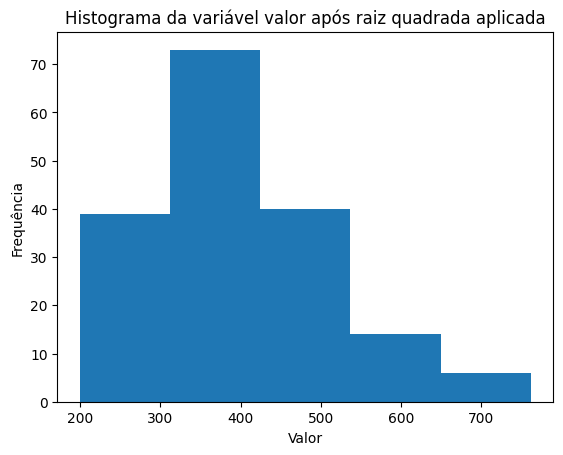

In [10]:
plt.hist(imoveis['raiz_valor'], bins = 5)

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma da variável valor após raiz quadrada aplicada')

### Explorando outras variáveis

#### Explorando variáveis quantitativas

Text(0, 0.5, 'Quantidade de Suites')

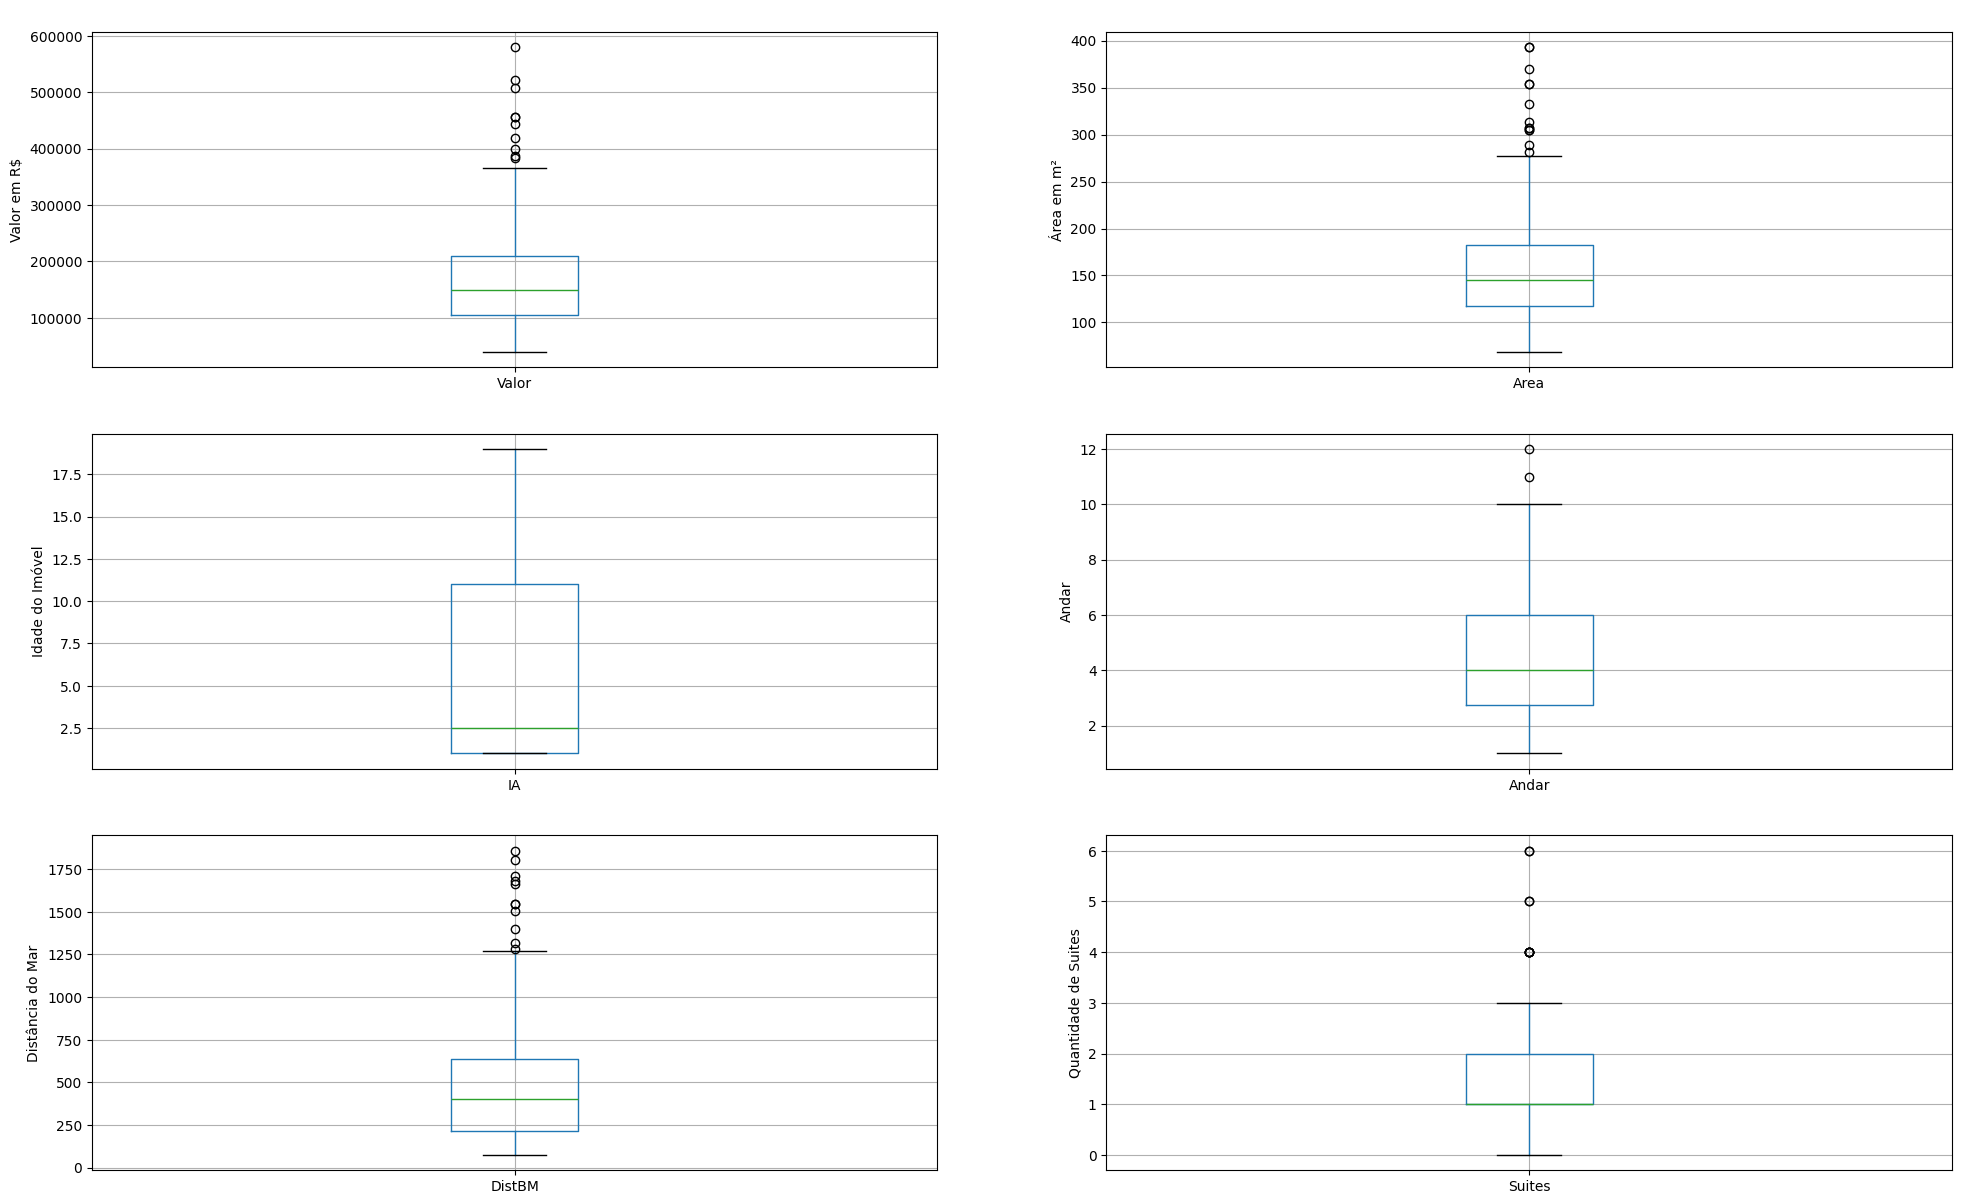

In [11]:
plt.figure(figsize = (24, 20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column = 'Valor')
fig.set_title(' ')
fig.set_ylabel('Valor em R$')

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column = 'Area')
fig.set_title(' ')
fig.set_ylabel('Área em m²')

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column = 'IA')
fig.set_title(' ')
fig.set_ylabel('Idade do Imóvel')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column = 'Andar')
fig.set_title(' ')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column = 'DistBM')
fig.set_title(' ')
fig.set_ylabel('Distância do Mar')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column = 'Suites')
fig.set_title(' ')
fig.set_ylabel('Quantidade de Suites')

<Axes: >

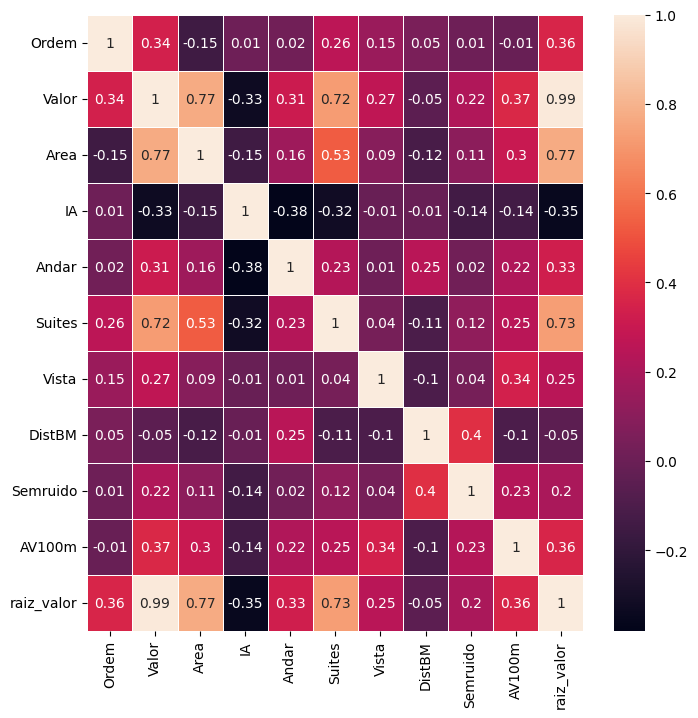

In [12]:
# matriz de correlação
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize = (8,8))
sb.heatmap(data = correlation_matrix, annot = True, linewidths= .5, ax = ax)

In [13]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


In [14]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression

# Criando um Objeto de Regressão Linear
lr = LinearRegression() 

In [15]:
# X contém as variáveis preditoras ou independentes
X = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y variável target ou dependente
y = imoveis[['Valor']]

In [16]:
X

,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
0,168,1,1,1,1,5,0,294
1,129,0,1,1,0,6,0,1505
2,218,1,1,0,0,8,1,251
3,180,1,12,0,0,4,0,245
4,120,1,15,1,0,3,0,956
...,...,...,...,...,...,...,...,...
167,82,0,14,1,0,2,0,485
168,134,0,11,1,1,2,1,827
169,135,2,9,1,1,3,1,414
170,141,2,1,0,0,6,0,305


In [17]:
y

,Valor
0,160000
1,67000
2,190000
3,110000
4,70000
...,...
167,80000
168,144000
169,176000
170,199956


In [18]:
from sklearn.model_selection import train_test_split

# Separando os dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [19]:
# Treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Calculando o valor predito da variável resposta na amostra teste
y_pred = lr.predict(X_test)

In [21]:
# Primeiro, vamos olhar o Intercepto e os Coeficientes de Regressão.
# Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais.
# Em termos gráficos, o Intercepto é o ponto onde a linha de regressão cruza o eixo vertical (eixo y)

print('Intercepto: ', lr.intercept_)

Intercepto:  [-40165.8752773]


In [22]:
# Os coeficientes de regressão linear representam as inclinações da linha de regressão para cada variável
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


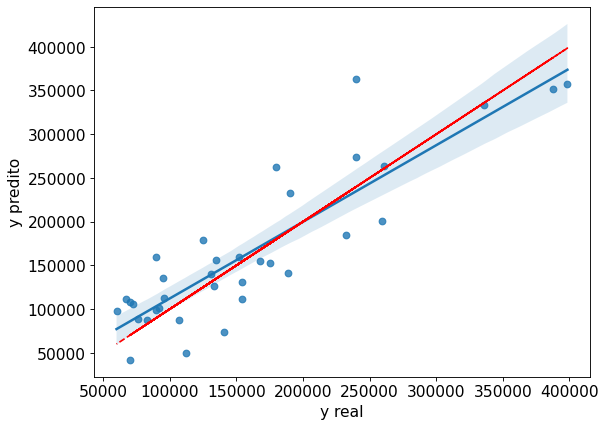

In [24]:
fig = plt.figure(figsize = (8,6), dpi = 80)
plt.rcParams.update({'font.size' : 14})
ax = sb.regplot( x = y_test, y = y_pred)
ax.set(xlabel = 'y real', ylabel = 'y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Avaliando o modelo
MAE = mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadrádicos
print('r2', r2) # (R-quadrado)

MAE 1844288772.178987
MSE 1844288772.178987
r2 0.7584591969125033


## Avaliando com Decision TreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

Vamos testar.

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
# Criando o modelo de DecisionTreeRegressor
modelo_dtr = DecisionTreeRegressor(random_state = 101, max_depth = 10)
modelo_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [29]:
y_pred_model_dtr = modelo_dtr.predict(X_test)

In [30]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r2', r2)

MAE 44913.75102040816
MSE 3223969337.3848395
r2 0.577766695417574


## Avaliando com SVR

Vamos agora testar um outro tipo de algoritmo para analisar a performance, o **Support Vector Regression**. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [32]:
from sklearn.svm import SVR

In [33]:
# Criando o modelo de SVM
svr = SVR(kernel = 'linear')

In [34]:
svr.fit(X_train, y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [35]:
y_pred_svr = svr.predict(X_test)

In [36]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r2', r2) # (R - quadrado)

MAE 43153.53918496288
MSE 3123421996.7782364
r2 0.5909350700044546
